### Problem Statement : Build A Model that can detect the Non Human Traffic present in a website!!!

- This project will make you understand lot of stuff & try to understand the problem statement by doing research,understanding each & every feature to play with it.


- We have apply some of the Encoding Technique at the end of the project while dealing with building a model & try to analyze the project where we have crated some different data set from the original one.


- For sure this project will give you best approach of why feature egineering is importat!!


- Here is a small approach for the project & try to analze the code what is happening & why.


- For sure there are better approch as compare to this one & looking for some more great approach.

## Why do we need to detect Bots ?
No matter how big your website is, you’re almost guaranteed to receive bot traffic at some point. These bots are often up to a range of different things on your site, from indexing web pages to scraping your content. With so many different bots out there, how can you detect bot traffic on your website? And should you be concerned?
#### Here are 5 reasons that why do need BOT Detection ?
- Bots can steal your content. You know that content you worked so hard to develop? Your carefully crafted blog posts and pages? All that effort could be wasted in a second if you let bots access your site. Bots can scrape your website for data, information and even pricing in just a matter of minutes. Then, it can be used on other sites, redistributed or even sold for profit in other areas of the web.

- Bots can slow down your site. Bots bog down your site and overwhelm it with inauthentic, fraudulent traffic. This results in slower page load times for your actual paying customers, which could affect their level of satisfaction or even deter them from buying or visiting altogether.

- Bots can threaten your website. Malicious bots can hack your website, insert inappropriate links and content, or even crash your site altogether. This can hurt your traffic, your customers and your sales.

- Bot can take up extra time and money. Many bots spend their time posting spam comments to websites and blogs. While this may not seem like a huge issue, it can be quite frustrating. You’ll have to spend hours each month sorting through these comments to separate the human commenters from the fraudulent ones, which takes you and your resources away from actually running your business. If you don’t remove these spam comments, they end up annoying your readers and possibly leading them away from your site.

- Bots can mess up your analytics. Analytics are hugely important to a website owner. They tell you how your site is performing, where traffic is coming from and what you might want to tweak throughout the site. Unfortunately, if you have a significant amount of bots accessing your site, this can throw your analytics into upheaval. You won’t have a clear picture of your site’s performance or your next steps for improvement, and you won’t be able to tell what’s real and what’s fake.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data_ibm = pd.read_csv('ibm_data.csv')

In [3]:
data_ibm.shape

(1048573, 19)

In [4]:
data_ibm.head()

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900
3,3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300
4,4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700


In [5]:
data_ibm['page_vw_ts'] = pd.to_datetime(data_ibm['page_vw_ts'])

In [6]:
data_ibm['page_vw_ts'].dt.year 

0          2019.0
1          2019.0
2          2019.0
3          2019.0
4          2019.0
            ...  
1048568    2019.0
1048569    2019.0
1048570    2019.0
1048571    2019.0
1048572    2019.0
Name: page_vw_ts, Length: 1048573, dtype: float64

In [7]:
data_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   Unnamed: 0                   1048573 non-null  int64         
 1   ctry_name                    1048573 non-null  object        
 2   intgrtd_mngmt_name           1048573 non-null  object        
 3   intgrtd_operating_team_name  1048573 non-null  object        
 4   city                         1001987 non-null  object        
 5   st                           1003128 non-null  object        
 6   sec_lvl_domn                 729116 non-null   object        
 7   device_type                  206532 non-null   object        
 8   operating_sys                1046753 non-null  object        
 9   ip_addr                      1048573 non-null  object        
 10  user_agent                   1048567 non-null  object        
 11  VISIT      

In [8]:
#filtering and storing the date 
data_ibm['crm_dt'] = data_ibm['page_vw_ts'].dt.date

In [9]:
data_ibm.head()

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,crm_dt
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,2019-06-04
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,2019-06-04
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,2019-06-04
3,3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300,2019-06-04
4,4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700,2019-06-04


In [10]:
#delete the page_vw_ts column
#data_ibm = data_ibm.drop('page_vw_ts', 1)
data_ibm.head()

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,crm_dt
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,2019-06-04
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,2019-06-04
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,2019-06-04
3,3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300,2019-06-04
4,4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700,2019-06-04


In [11]:
import pandas as pd
import scipy as stats
import numpy as np
from statistics import mean 
import datetime

In [12]:
data_ibm.head(1)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,crm_dt
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,2019-06-04


#### DATA Preprocessing  on ip_info Dataset

In [13]:
data_ibm.dropna(subset=['city','st','operating_sys'], inplace=True)
data_ibm.device_type.fillna(value='unkown_device', inplace=True)
data_ibm.sec_lvl_domn.fillna(value='unkown_domain', inplace=True)
data_ibm.dropna(inplace=True)
data_ibm.drop(labels=['wk', 'mth', 'yr', 'crm_dt'], axis=1, inplace=True)

In [14]:
# Adding a Bounce_rate Column 
data_ibm["bounce_rate_%"] = ((data_ibm.VISIT - data_ibm.ENGD_VISIT)/data_ibm.VISIT)*100

In [15]:
data_ibm.head(2)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,page_vw_ts,bounce_rate_%
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,2019-06-04 05:05:18.023100,100.0
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,2019-06-04 05:07:11.014300,100.0


In [16]:
# Total of No. Of unique IP's
data_ibm.ip_addr.nunique()

443870

#### We can't work on all the ip's that visit our website in a day because many of them just visit only a single time So we try to filter those ip's that has high no. of views or visit too mant times, In rules Of detecting bot it is mentioned that bots show a similar pattern in visiting any website...

In [17]:
# IP Addres's that has total views greater than 24 in a day
ip_views = pd.DataFrame(data_ibm.groupby('ip_addr').VIEWS.sum().sort_values())
unique_ip_address = list(ip_views[ip_views.VIEWS > 24].index)

# Limiting the Dataset to those rows that contain one of the ip's present in unique_ip_address 
#new_data_details = data_details[data_details.ip_addr.isin(unique_ip_address)]
new_data = data_ibm[data_ibm.ip_addr.isin(unique_ip_address)]

# Taking intersection of ip's
#unique_ip_address = list(new_data_details.ip_addr.unique())

# These are the filterd IP's on which we have to find Infomation.
print("No. Of unique ip's {}".format(len(unique_ip_address)))

# Examples of unique ip address
unique_ip_address[:10]

No. Of unique ip's 7231


['38d87886d615dd8e5f3f92d4b3bc7c344e4125633e6ea0cc90f70a5bffc1a69a',
 '2d514edec300dea1ee1eae5170bd1dd24c6e628d2f28074ec7ffe62ccb009b00',
 'bc47449f582bde3943caa85c67a59a7c2b5dee4d2800a4ee8723e065d68eb74e',
 '7a8211f17123bbd84bbfd914498104a1f42932a691f5eb6299fe7217e3dc67a3',
 'ee1c6a74446bbf39ac19431e415c431e4c6e47f9a415bbd514e3c6d1acb6386b',
 '14fdc36060a6c319e7f616157cc48d83c253caccac6ac1d2838de56c1e23ce6d',
 '5134b48b14c000e886c74619ee11cccb1dbe98c6ed3c3dc82550a7a33bc6d9ee',
 '16ebc267de6c5c886c7c515fbac4b9137abe0611f8ceba82835faa44913e1ad1',
 '23e225f92cf2669e1aa550a7e4a92efa943474e02c78aea18bb35774032bf497',
 '13656abd7d885ddee912bd9d8a96a2feed0362a8383ac7527d74e777e3d40ab0']

In [18]:
data_ibm.head(1)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,page_vw_ts,bounce_rate_%
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,2019-06-04 05:05:18.023100,100.0


In [19]:
new_data.head()

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,page_vw_ts,bounce_rate_%
22,22,United States,United States,North America,DALLAS,TEXAS,unkown_domain,MOBILEPHONE,ANDROID_7.1.2,6b9a0b17ec5766e271c837487b5664652541413a9e642e...,MOZILLA/5.0 (LINUX; ANDROID 7.1.2; LM-X210CM) ...,2,0,2,www-01.ibm.com/support/docview.wss?uid=swg2703...,2019-06-04 05:09:22.035300,100.0
24,24,Germany,DACH,Europe,HANNOVER,NIEDERSACHSEN,MH-HANNOVER.DE,unkown_device,MICROSOFT_WINDOWS7,25e61bd91b3c3213f470aa1d86ef7fd53f53b86477774c...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64; RV:60.0) G...,1,0,1,careers.ibm.com/listjobs/all/search/position-t...,2019-06-04 05:06:32.004700,100.0
26,26,Singapore,ASEAN,Asia Pacific,SINGAPORE,NONE,MYREPUBLIC.COM.SG,unkown_device,MICROSOFT_WINDOWS10,c68680caf20e4a3b13fd13ccb8a6c7eabe5e7518300237...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssprek_...,2019-06-04 05:02:26.086700,0.0
28,28,Singapore,ASEAN,Asia Pacific,SINGAPORE,NONE,MYREPUBLIC.COM.SG,unkown_device,MICROSOFT_WINDOWS10,c68680caf20e4a3b13fd13ccb8a6c7eabe5e7518300237...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,2,www.ibm.com/support/knowledgecenter/en/ssprek_...,2019-06-04 04:59:25.062400,0.0
33,33,India,India-South Asia,Asia Pacific,PUNE,MAHARASHTRA,AIRTEL.IN,unkown_device,MICROSOFT_WINDOWS8.1,088340af2ec8df7760bb22ef568b9e7e506c53bc9d9949...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/developerworks/community/wikis/home,2019-06-04 05:03:47.003200,100.0


## We will proceed in three Major steps.

## STEP 1 :  

####  In this part of loop we will find the infomation about the unique ip's, This Loop will give  visit per hour                     plus the corresponding Bounce rate  of each ip's plus its information related to its origin and using                           these all information it will construct a dataframe on which we can train a model...

In [20]:
%%time
# This loop will find the views for each hour and also find the corresponding 
# bounce rate( i used median for bounce rate because mean was giving wrong results)
# and its infomation...

ip_hour_avg = pd.DataFrame([np.arange(24)])
ip_info = new_data.loc[new_data.ip_addr == unique_ip_address[0], 'ctry_name':'ip_addr'].head(1)

CPU times: user 58.4 ms, sys: 1.06 ms, total: 59.4 ms
Wall time: 58.2 ms


In [21]:
ip_hour_avg

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23


In [22]:
count=0
bounce_rate = []
for ip_adres in (unique_ip_address):
    
    print("Iteration No. {}".format(count))
    time_data      = new_data[new_data.ip_addr==ip_adres]
    bounce_data    = new_data[new_data.ip_addr==ip_adres]
    unique_ip_info = new_data.loc[new_data.ip_addr == ip_adres, 'ctry_name':'ip_addr'].head(1)
    
    ip_info   = pd.concat([ip_info, unique_ip_info])
    b_rate    = bounce_data['bounce_rate_%'].median()
    bounce_rate.append(b_rate)
    
    hour_list = []
    for i in range(24):
        x = time_data[time_data.page_vw_ts.dt.hour == i].VIEWS.sum()
        hour_list.append(x)
    
    ip_dataframe  = pd.DataFrame([hour_list])    
    ip_hour_avg   = pd.concat([ip_hour_avg,ip_dataframe])
    count+=1

Iteration No. 0
Iteration No. 1
Iteration No. 2
Iteration No. 3
Iteration No. 4
Iteration No. 5
Iteration No. 6
Iteration No. 7
Iteration No. 8
Iteration No. 9
Iteration No. 10
Iteration No. 11
Iteration No. 12
Iteration No. 13
Iteration No. 14
Iteration No. 15
Iteration No. 16
Iteration No. 17
Iteration No. 18
Iteration No. 19
Iteration No. 20
Iteration No. 21
Iteration No. 22
Iteration No. 23
Iteration No. 24
Iteration No. 25
Iteration No. 26
Iteration No. 27
Iteration No. 28
Iteration No. 29
Iteration No. 30
Iteration No. 31
Iteration No. 32
Iteration No. 33
Iteration No. 34
Iteration No. 35
Iteration No. 36
Iteration No. 37
Iteration No. 38
Iteration No. 39
Iteration No. 40
Iteration No. 41
Iteration No. 42
Iteration No. 43
Iteration No. 44
Iteration No. 45
Iteration No. 46
Iteration No. 47
Iteration No. 48
Iteration No. 49
Iteration No. 50
Iteration No. 51
Iteration No. 52
Iteration No. 53
Iteration No. 54
Iteration No. 55
Iteration No. 56
Iteration No. 57
Iteration No. 58
Iterati

In [23]:
unique_ip_info.to_csv('unique_ip_info.csv')
ip_hour_avg.to_csv('ip_hour_avg.csv')

In [24]:
# Deleting first row from both DATASETS
ip_hour_avg = ip_hour_avg.iloc[1:,:]
ip_info     = ip_info.iloc[1:,:]

In [25]:
# Resetting Index 
ip_hour_avg = ip_hour_avg.set_index(np.arange(0,ip_hour_avg.shape[0]))
ip_info     = ip_info.set_index(np.arange(0,ip_info.shape[0])) 

In [26]:
# Finding Hourly_avg, daily_avg and Attaching corresponding Bounce_rate
ip_sum  = ip_hour_avg.sum(axis=1) #daily avg
ip_mean = ip_hour_avg.mean(axis=1) #hourly avg

In [27]:
ip_hour_avg['hour_avg']   = ip_mean
ip_hour_avg['daily_avg']  = ip_sum

In [28]:
ip_hour_avg['daily_avg']

0         25
1         25
2         25
3         25
4         25
        ... 
7226    1444
7227    1923
7228    2124
7229    2456
7230    2706
Name: daily_avg, Length: 7231, dtype: int64

In [29]:
ip_hour_avg['avg_bounce_rate'] = bounce_rate

In [30]:
#ip_hour_avg['avg_bounce_rate']

In [31]:
# Joining Both Datasets
new_ip_data = pd.merge(ip_info, ip_hour_avg, on=ip_info.index, how='outer')
new_ip_data.head()

,key_0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,...,17,18,19,20,21,22,23,hour_avg,daily_avg,avg_bounce_rate
0,0,Switzerland,DACH,Europe,ZUERICH,ZUERICH,unkown_domain,unkown_device,MICROSOFT_WINDOWS10,38d87886d615dd8e5f3f92d4b3bc7c344e4125633e6ea0...,...,0,0,8,4,1,0,0,1.041667,25,50.0
1,1,"Korea, Republic of",Korea,Asia Pacific,GANGSEO-GU (SEOUL),SEOUL TEUKBYEOLSI,CHUNHONCARE.COM,unkown_device,MICROSOFT_WINDOWS7,2d514edec300dea1ee1eae5170bd1dd24c6e628d2f2807...,...,1,1,3,0,0,2,0,1.041667,25,100.0
2,2,Spain,SPGI,Europe,BARCELONA,BARCELONA,RIMA-TDE.NET,TABLET,IOS_12.1.4,bc47449f582bde3943caa85c67a59a7c2b5dee4d2800a4...,...,0,0,0,0,0,0,1,1.041667,25,0.0
3,3,Japan,Japan,Japan,TOKYO,TOKYO,MESH.AD.JP,unkown_device,MICROSOFT_WINDOWS7,7a8211f17123bbd84bbfd914498104a1f42932a691f5eb...,...,0,0,0,1,1,0,0,1.041667,25,0.0
4,4,Japan,Japan,Japan,MINATO-KU (TOKYO),TOKYO,UCOM.NE.JP,unkown_device,MICROSOFT_WINDOWS10,ee1c6a74446bbf39ac19431e415c431e4c6e47f9a415bb...,...,0,3,0,0,0,0,0,1.041667,25,0.0


In [32]:
new_ip_data.drop(['key_0'], axis=1, inplace=True)


# Changing Columns Name  to strings just for simplicity in future filtering... 
new_ip_data.columns = [                  'ctry_name',          'intgrtd_mngmt_name',
       'intgrtd_operating_team_name',                        'city',
                                'st',                'sec_lvl_domn',
                       'device_type',               'operating_sys',
                           'ip_addr',                             '0_hour',
                                   '1_hour',                             '2_hour',
                                   '3_hour',                             '4_hour',
                                   '5_hour',                             '6_hour',
                                   '7_hour',                             '8_hour',
                                   '9_hour',                            '10_hour',
                                  '11_hour',                            '12_hour',
                                  '13_hour',                            '14_hour',
                                  '15_hour',                            '16_hour',
                                  '17_hour',                            '18_hour',
                                  '19_hour',                            '20_hour',
                                  '21_hour',                            '22_hour',
                                  '23_hour',                    'hour_avg',
                         'daily_avg',             'avg_bounce_rate']

new_ip_data['date'] = (new_data.page_vw_ts.dt.date.value_counts().keys()[0]) 


# This loop will give a DATAFRAME that has all the information of each ip_address...

In [33]:
new_ip_data

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,0_hour,...,18_hour,19_hour,20_hour,21_hour,22_hour,23_hour,hour_avg,daily_avg,avg_bounce_rate,date
0,Switzerland,DACH,Europe,ZUERICH,ZUERICH,unkown_domain,unkown_device,MICROSOFT_WINDOWS10,38d87886d615dd8e5f3f92d4b3bc7c344e4125633e6ea0...,1,...,0,8,4,1,0,0,1.041667,25,50.000000,2019-06-04
1,"Korea, Republic of",Korea,Asia Pacific,GANGSEO-GU (SEOUL),SEOUL TEUKBYEOLSI,CHUNHONCARE.COM,unkown_device,MICROSOFT_WINDOWS7,2d514edec300dea1ee1eae5170bd1dd24c6e628d2f2807...,1,...,1,3,0,0,2,0,1.041667,25,100.000000,2019-06-04
2,Spain,SPGI,Europe,BARCELONA,BARCELONA,RIMA-TDE.NET,TABLET,IOS_12.1.4,bc47449f582bde3943caa85c67a59a7c2b5dee4d2800a4...,0,...,0,0,0,0,0,1,1.041667,25,0.000000,2019-06-04
3,Japan,Japan,Japan,TOKYO,TOKYO,MESH.AD.JP,unkown_device,MICROSOFT_WINDOWS7,7a8211f17123bbd84bbfd914498104a1f42932a691f5eb...,0,...,0,0,1,1,0,0,1.041667,25,0.000000,2019-06-04
4,Japan,Japan,Japan,MINATO-KU (TOKYO),TOKYO,UCOM.NE.JP,unkown_device,MICROSOFT_WINDOWS10,ee1c6a74446bbf39ac19431e415c431e4c6e47f9a415bb...,0,...,3,0,0,0,0,0,1.041667,25,0.000000,2019-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7226,India,India-South Asia,Asia Pacific,BENGALURU,KARNATAKA,ARTECHINFO.IN,unkown_device,MICROSOFT_WINDOWS7,80a4a0749b39a6edc78f32f6424a632659ec6f4013a304...,0,...,2,0,0,15,0,48,60.166667,1444,83.333333,2019-06-04
7227,Mexico,Mexico,Latin America,SALAMANCA,GUANAJUATO,UNINET-IDE.COM.MX,unkown_device,MICROSOFT_WINDOWS10,3a16416d5b01a64dce4d14ddcc493328b48ac5be923f95...,23,...,70,129,58,4,150,18,80.125000,1923,0.000000,2019-06-04
7228,Japan,Japan,Japan,TOKYO,TOKYO,OCN.NE.JP,unkown_device,MICROSOFT_WINDOWS10,45fdddb0ff08492fe16bab881a61bcb2b3f52c7942d3bf...,24,...,75,173,16,7,29,31,88.500000,2124,10.597826,2019-06-04
7229,Japan,Japan,Japan,CHIYODA-KU,TOKYO,NIANDC.CO.JP,unkown_device,MICROSOFT_WINDOWS7,0ec667e87013e1398ddaa61c14f7118f0dd6adc9abc2a2...,21,...,43,78,54,75,35,74,102.333333,2456,50.000000,2019-06-04


In [34]:
new_ip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7231 entries, 0 to 7230
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ctry_name                    7231 non-null   object 
 1   intgrtd_mngmt_name           7231 non-null   object 
 2   intgrtd_operating_team_name  7231 non-null   object 
 3   city                         7231 non-null   object 
 4   st                           7231 non-null   object 
 5   sec_lvl_domn                 7231 non-null   object 
 6   device_type                  7231 non-null   object 
 7   operating_sys                7231 non-null   object 
 8   ip_addr                      7231 non-null   object 
 9   0_hour                       7231 non-null   int64  
 10  1_hour                       7231 non-null   int64  
 11  2_hour                       7231 non-null   int64  
 12  3_hour                       7231 non-null   int64  
 13  4_hour            

# Below we are creating a new dataset which will help to understand the nature of incoming ip_address & try to understand why this particular dataset created below plays an important role knowns as global_dataset.

In [35]:
# Taking the example Dataset
example_dataset = pd.DataFrame([data_ibm.iloc[0,:13]])
example_dataset.columns

Index(['Unnamed: 0', 'ctry_name', 'intgrtd_mngmt_name',
       'intgrtd_operating_team_name', 'city', 'st', 'sec_lvl_domn',
       'device_type', 'operating_sys', 'ip_addr', 'user_agent', 'VISIT',
       'ENGD_VISIT'],
      dtype='object')

In [36]:
example_dataset.drop(['Unnamed: 0'],1,inplace=True)
example_dataset.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0


In [37]:
example_dataset.columns = columns=[                  'ctry_name',          'intgrtd_mngmt_name',
       'intgrtd_operating_team_name',                        'city',
                                'st',                'sec_lvl_domn',
                       'device_type',               'operating_sys',
                           'ip_addr',                             'daily_info',
                                   'weekday_info',                             'date']
example_dataset

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,daily_info,weekday_info,date
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0


In [38]:
example_dataset.weekday_info = example_dataset.weekday_info.astype('object')
example_dataset.date = example_dataset.date.astype('object')
example_dataset.daily_info = example_dataset.daily_info.astype('object')
example_dataset.at[0,'daily_info'] = []
example_dataset.at[0,'weekday_info'] = []
example_dataset.at[0,'date'] = []
example_dataset

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,daily_info,weekday_info,date
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,[],[],[]


# Step 2:
#### This Loop will make the Global Dataset, Basically Global Dataset contain all the history of an ip_addr  that has visited us before and if its visit us again then this loop will append its important values to the global_dataset. This Dataset will be the most important part of the program because it will help in labeling the classes as a bot , it contain the information that will used by our next part when we label the classes.

In [39]:
gl_data = example_dataset.copy()
gl_data.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,daily_info,weekday_info,date
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,[],[],[]


In [40]:
# This loop will run in two parts first it check that the ip has visited us before or not based on that
# it will apppend its values for old IP's or will attach the new row for new ip's.

count=0
#gl_data = example_dataset.copy()
dt = str(new_ip_data.at[0,'date'])
wk_day = datetime.datetime.strptime(dt, '%Y-%m-%d').weekday()

In [41]:
new_ip_data.columns

Index(['ctry_name', 'intgrtd_mngmt_name', 'intgrtd_operating_team_name',
       'city', 'st', 'sec_lvl_domn', 'device_type', 'operating_sys', 'ip_addr',
       '0_hour', '1_hour', '2_hour', '3_hour', '4_hour', '5_hour', '6_hour',
       '7_hour', '8_hour', '9_hour', '10_hour', '11_hour', '12_hour',
       '13_hour', '14_hour', '15_hour', '16_hour', '17_hour', '18_hour',
       '19_hour', '20_hour', '21_hour', '22_hour', '23_hour', 'hour_avg',
       'daily_avg', 'avg_bounce_rate', 'date'],
      dtype='object')

In [42]:
len(unique_ip_address)

7231

In [43]:
for ip_adrr in unique_ip_address:
    print("Iteration No. {}".format(count))
    
    if(ip_adrr in gl_data.ip_addr.unique()):
        
        idn = new_ip_data[new_ip_data.ip_addr == ip_adrr].index[0]
        vw =   new_ip_data.at[idn,'daily_avg']
        
        gl_data.at[idn,'daily_info'].append(vw)
        gl_data.at[idn,'weekday_info'].append(wk_day)
        #gl_data.at[idn,'date_info'].append(dt)
        gl_data.at[idn,'date'].append(dt)
        
    else:
        idx = new_ip_data[new_ip_data.ip_addr == ip_adrr].index[0]
        
        view = new_ip_data.at[idx,'daily_avg']
        
        a_data = new_data.loc[new_data.ip_addr == ip_adrr, 'ctry_name':'ip_addr'].head(1)
       # b_data = (pd.DataFrame([(ip_adrr,[view],[wk_day],[dt])],columns=['ip_addr',"daily_info",'weekday_info','date_info']))
        b_data = (pd.DataFrame([(ip_adrr,[view],[wk_day],[dt])],columns=['ip_addr',"daily_info",'weekday_info','date']))
        ip_info =pd.merge(a_data, b_data, on='ip_addr')
        
        gl_data = pd.concat([gl_data, ip_info], ignore_index=True)
        
    count+=1

    

Iteration No. 0
Iteration No. 1
Iteration No. 2
Iteration No. 3
Iteration No. 4
Iteration No. 5
Iteration No. 6
Iteration No. 7
Iteration No. 8
Iteration No. 9
Iteration No. 10
Iteration No. 11
Iteration No. 12
Iteration No. 13
Iteration No. 14
Iteration No. 15
Iteration No. 16
Iteration No. 17
Iteration No. 18
Iteration No. 19
Iteration No. 20
Iteration No. 21
Iteration No. 22
Iteration No. 23
Iteration No. 24
Iteration No. 25
Iteration No. 26
Iteration No. 27
Iteration No. 28
Iteration No. 29
Iteration No. 30
Iteration No. 31
Iteration No. 32
Iteration No. 33
Iteration No. 34
Iteration No. 35
Iteration No. 36
Iteration No. 37
Iteration No. 38
Iteration No. 39
Iteration No. 40
Iteration No. 41
Iteration No. 42
Iteration No. 43
Iteration No. 44
Iteration No. 45
Iteration No. 46
Iteration No. 47
Iteration No. 48
Iteration No. 49
Iteration No. 50
Iteration No. 51
Iteration No. 52
Iteration No. 53
Iteration No. 54
Iteration No. 55
Iteration No. 56
Iteration No. 57
Iteration No. 58
Iterati

In [44]:
gl_data

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,daily_info,weekday_info,date
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,[],[],[]
1,Switzerland,DACH,Europe,ZUERICH,ZUERICH,unkown_domain,unkown_device,MICROSOFT_WINDOWS10,38d87886d615dd8e5f3f92d4b3bc7c344e4125633e6ea0...,[25],[1],[2019-06-04]
2,"Korea, Republic of",Korea,Asia Pacific,GANGSEO-GU (SEOUL),SEOUL TEUKBYEOLSI,CHUNHONCARE.COM,unkown_device,MICROSOFT_WINDOWS7,2d514edec300dea1ee1eae5170bd1dd24c6e628d2f2807...,[25],[1],[2019-06-04]
3,Spain,SPGI,Europe,BARCELONA,BARCELONA,RIMA-TDE.NET,TABLET,IOS_12.1.4,bc47449f582bde3943caa85c67a59a7c2b5dee4d2800a4...,[25],[1],[2019-06-04]
4,Japan,Japan,Japan,TOKYO,TOKYO,MESH.AD.JP,unkown_device,MICROSOFT_WINDOWS7,7a8211f17123bbd84bbfd914498104a1f42932a691f5eb...,[25],[1],[2019-06-04]
...,...,...,...,...,...,...,...,...,...,...,...,...
7227,India,India-South Asia,Asia Pacific,BENGALURU,KARNATAKA,ARTECHINFO.IN,unkown_device,MICROSOFT_WINDOWS7,80a4a0749b39a6edc78f32f6424a632659ec6f4013a304...,[1444],[1],[2019-06-04]
7228,Mexico,Mexico,Latin America,SALAMANCA,GUANAJUATO,UNINET-IDE.COM.MX,unkown_device,MICROSOFT_WINDOWS10,3a16416d5b01a64dce4d14ddcc493328b48ac5be923f95...,[1923],[1],[2019-06-04]
7229,Japan,Japan,Japan,TOKYO,TOKYO,OCN.NE.JP,unkown_device,MICROSOFT_WINDOWS10,45fdddb0ff08492fe16bab881a61bcb2b3f52c7942d3bf...,[2124],[1],[2019-06-04]
7230,Japan,Japan,Japan,CHIYODA-KU,TOKYO,NIANDC.CO.JP,unkown_device,MICROSOFT_WINDOWS7,0ec667e87013e1398ddaa61c14f7118f0dd6adc9abc2a2...,[2456],[1],[2019-06-04]


In [45]:
gl_data.to_csv("global_dataset.csv")

In [ ]:
#gl_data.head()

# Step 3:
#### In this part of program we will label the the ip's in "new_ip_data" Dataset with the help of ''Global Datasets"  and the Rules... 

In [46]:
gl_data.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,daily_info,weekday_info,date
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,[],[],[]
1,Switzerland,DACH,Europe,ZUERICH,ZUERICH,unkown_domain,unkown_device,MICROSOFT_WINDOWS10,38d87886d615dd8e5f3f92d4b3bc7c344e4125633e6ea0...,[25],[1],[2019-06-04]
2,"Korea, Republic of",Korea,Asia Pacific,GANGSEO-GU (SEOUL),SEOUL TEUKBYEOLSI,CHUNHONCARE.COM,unkown_device,MICROSOFT_WINDOWS7,2d514edec300dea1ee1eae5170bd1dd24c6e628d2f2807...,[25],[1],[2019-06-04]
3,Spain,SPGI,Europe,BARCELONA,BARCELONA,RIMA-TDE.NET,TABLET,IOS_12.1.4,bc47449f582bde3943caa85c67a59a7c2b5dee4d2800a4...,[25],[1],[2019-06-04]
4,Japan,Japan,Japan,TOKYO,TOKYO,MESH.AD.JP,unkown_device,MICROSOFT_WINDOWS7,7a8211f17123bbd84bbfd914498104a1f42932a691f5eb...,[25],[1],[2019-06-04]


In [47]:
gl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7232 entries, 0 to 7231
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ctry_name                    7232 non-null   object
 1   intgrtd_mngmt_name           7232 non-null   object
 2   intgrtd_operating_team_name  7232 non-null   object
 3   city                         7232 non-null   object
 4   st                           7232 non-null   object
 5   sec_lvl_domn                 7232 non-null   object
 6   device_type                  7232 non-null   object
 7   operating_sys                7232 non-null   object
 8   ip_addr                      7232 non-null   object
 9   daily_info                   7232 non-null   object
 10  weekday_info                 7232 non-null   object
 11  date                         7232 non-null   object
dtypes: object(12)
memory usage: 678.1+ KB


In [48]:
# This function will give a dataframe that has all previous info. of single IP address
# INUPT: ip in string, new_ip_data, global_dataset
def ip_info(ip_address, global_data):
    idn = global_data[global_data.ip_addr == ip_address].index[0]
    d_vw =  pd.DataFrame(global_data.at[idn,'daily_info'])
    w_vw =  pd.DataFrame(global_data.at[idn,'weekday_info']) #take number not name
    d_in =  pd.DataFrame(global_data.at[idn,"date"])
    return pd.concat([d_vw,pd.concat([w_vw,d_in],axis=1)],axis=1)

In [49]:
#
def hour_rule(daily_dataset):
    ip_min = daily_dataset.iloc[:,9:33].min(axis=1)
    ip_max = daily_dataset.iloc[:,9:33].max(axis=1)
    ip_mean = daily_dataset.hour_avg
    daily_dataset["hour_per"] = pd.DataFrame([round((abs(ip_min - ip_mean )/ip_mean), ndigits=2),round((abs(ip_max - ip_mean )/ip_mean), ndigits=2)]).max()
    #daily_dataset.insert(daily_dataset.shape[1], "bot_prob", 0.00)
    daily_dataset['bot_prob']=0.00
    daily_dataset.loc[daily_dataset.hour_per < 10.00, "bot_prob"] += 0.15
    daily_dataset.drop(['hour_per'], axis=1, inplace=True)

def max_absolute(global_dataset,idx_g):
    return max(round((abs(min(global_dataset.at[idx_g,"daily_info"]) - mean(global_dataset.at[idx_g,"daily_info"]) )/mean(global_dataset.at[idx_g,"daily_info"])), ndigits=2),round((abs(max(global_dataset.at[idx_g,"daily_info"]) - mean(global_dataset.at[idx_g,"daily_info"]) )/mean(global_dataset.at[idx_g,"daily_info"])), ndigits=2))
     
def wk_rule(ip,  global_dataset):
    x = ip_info(ip, global_dataset)
    columns=['daily_info','weekday_info','date']
    x.columns=columns
    a = x[x.weekday_info < 5].weekday_info.mean()
    b = x[x.weekday_info > 4].weekday_info.mean()
    return abs(a-b)/max(a,b) 

In [50]:
# Rule_1 Labeling on basis of hour
hour_rule(new_ip_data)

count=0
for ip in unique_ip_address:
    print("Iteration No. {}".format(count))
    
    if(ip in gl_data.ip_addr.unique()):
        
        idx_n = new_ip_data[new_ip_data.ip_addr == ip].index[0]  #Index of ip in daily_dataset
       
        #Rule_2 Labeling on basis of daily_avg
        idx_g = gl_data[gl_data.ip_addr == ip].index[0]  #Index of ip in global_dataset
        if (max_absolute(gl_data, idx_g) < 10.00):
            new_ip_data.at[idx_n,"bot_prob"] += 0.15
            
        #Rule_3 Labeling on basis of weekday_avg
        if (wk_rule(ip,gl_data) < 10.00):
            new_ip_data.at[idx_n,"bot_prob"] += 0.15
            
        #Rule_4 Labeling on basis of bounce rate
        if(new_ip_data.at[idx_n,"avg_bounce_rate"] >= 80.0):
            new_ip_data.at[idx_n,"bot_prob"] += 0.10
            
        #Rule_5 Labeling on basis of Operating system
        if(new_ip_data.at[idx_n,"operating_sys"] == 'LINUX'):
            new_ip_data.at[idx_n,"bot_prob"] += 0.10
            
        
    else:
        # If we dont have previous information of an ip_address then we are left with only three rules..
        # a. Hourly_average
        # b. bounce_rate
        # c. Operating_system
        
        idx_n = new_ip_data[new_ip_data.ip_addr == ip].index[0]  #Index of ip in daily_dataset
        
        # Labeling on basis of bounce rate
        if(new_ip_data.at[idx_n,"avg_bounce_rate"] >= 80.0):
            new_ip_data.at[idx_n,"bot_prob"] += 0.10
        
        # Labeling on basis of Operating system
        if(new_ip_data.at[idx_n,"operating_sys"] == 'LINUX'):
            new_ip_data.at[idx_n,"bot_prob"] += 0.10
        
        
    count+=1
    
    

Iteration No. 0
Iteration No. 1
Iteration No. 2
Iteration No. 3
Iteration No. 4
Iteration No. 5
Iteration No. 6
Iteration No. 7
Iteration No. 8
Iteration No. 9
Iteration No. 10
Iteration No. 11
Iteration No. 12
Iteration No. 13
Iteration No. 14
Iteration No. 15
Iteration No. 16
Iteration No. 17
Iteration No. 18
Iteration No. 19
Iteration No. 20
Iteration No. 21
Iteration No. 22
Iteration No. 23
Iteration No. 24
Iteration No. 25
Iteration No. 26
Iteration No. 27
Iteration No. 28
Iteration No. 29
Iteration No. 30
Iteration No. 31
Iteration No. 32
Iteration No. 33
Iteration No. 34
Iteration No. 35
Iteration No. 36
Iteration No. 37
Iteration No. 38
Iteration No. 39
Iteration No. 40
Iteration No. 41
Iteration No. 42
Iteration No. 43
Iteration No. 44
Iteration No. 45
Iteration No. 46
Iteration No. 47
Iteration No. 48
Iteration No. 49
Iteration No. 50
Iteration No. 51
Iteration No. 52
Iteration No. 53
Iteration No. 54
Iteration No. 55
Iteration No. 56
Iteration No. 57
Iteration No. 58
Iterati

In [51]:
#This is the our final Dataset on which we train the model
new_ip_data.sample(10)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,0_hour,...,19_hour,20_hour,21_hour,22_hour,23_hour,hour_avg,daily_avg,avg_bounce_rate,date,bot_prob
4668,United States,United States,North America,BURLINGTON,NORTH CAROLINA,LABCORP.COM,unkown_device,MICROSOFT_WINDOWS10,d9142898acede1ffc970e47f4c2fa232817c52a92f3f87...,0,...,2,8,0,2,0,2.083333,50,100.0,2019-06-04,0.4
4412,United States,United States,North America,ARVADA,COLORADO,COMCAST.NET,unkown_device,MICROSOFT_WINDOWS10,3b172764e9622d4892e6027e68638ed8f3114865ddad03...,8,...,2,12,0,0,0,1.958333,47,0.0,2019-06-04,0.3
6032,Germany,DACH,Europe,DARMSTADT,HESSEN,SOFTWARE-AG.DE,unkown_device,MICROSOFT_WINDOWS8.1,2f19ed3c1596946b92c50de2c49c7d5a773f04ec43a1a2...,3,...,11,5,1,0,1,3.291667,79,0.0,2019-06-04,0.3
2810,Morocco,Middle East & Africa,Middle East & Africa,CASABLANCA,CASABLANCA-SETTAT,unkown_domain,unkown_device,MICROSOFT_WINDOWS10,e6e14c32a304e6ade20fe8f3a3aef27f2bcc417a4d30a1...,0,...,3,1,1,0,2,1.458333,35,0.0,2019-06-04,0.3
3285,Turkey,Middle East & Africa,Middle East & Africa,ISTANBUL,ISTANBUL,GRID.COM.TR,unkown_device,MICROSOFT_WINDOWS10,8bf0801e942eb707de29248ffba7695cf840494d612e72...,0,...,0,0,0,0,0,1.541667,37,100.0,2019-06-04,0.4
6431,United States,United States,North America,CHATTANOOGA,TENNESSEE,UNUM.COM,unkown_device,MICROSOFT_WINDOWS10,1193e77f8822675c0aeee6442a57d9f38d1f9deb2c76fe...,2,...,5,6,2,2,2,4.166667,100,100.0,2019-06-04,0.4
5384,United States,United States,North America,WILSON,NORTH CAROLINA,BBT.COM,unkown_device,MICROSOFT_WINDOWS10,53e2c0c937d0e71bd3ce813b7b7197d8ff416ca238cef6...,2,...,2,1,2,2,1,2.541667,61,100.0,2019-06-04,0.4
3707,Germany,DACH,Europe,KOELN,NORDRHEIN-WESTFALEN,unkown_domain,unkown_device,MICROSOFT_WINDOWS7,5c19b0aa7165d7dd22998febfe8fb34930051b915fa7bd...,1,...,2,0,0,0,1,1.666667,40,100.0,2019-06-04,0.4
2433,United States,United States,North America,TAMPA,FLORIDA,unkown_domain,unkown_device,MICROSOFT_WINDOWS7,ef4a7a388884f31ef9f8f30fc3490052dd7f58fc2573fb...,2,...,2,0,0,0,1,1.375000,33,100.0,2019-06-04,0.4
3656,China,Greater China,Greater China Group,BAOTOU,NEI MONGOL,163DATA.COM.CN,unkown_device,MICROSOFT_WINDOWS7,3546cf485a66a9b8eac55c18588ae26dd43f9c56977d5e...,4,...,6,0,0,0,0,1.666667,40,0.0,2019-06-04,0.3


In [52]:
new_ip_data[new_ip_data.bot_prob > 0.1]

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,0_hour,...,19_hour,20_hour,21_hour,22_hour,23_hour,hour_avg,daily_avg,avg_bounce_rate,date,bot_prob
0,Switzerland,DACH,Europe,ZUERICH,ZUERICH,unkown_domain,unkown_device,MICROSOFT_WINDOWS10,38d87886d615dd8e5f3f92d4b3bc7c344e4125633e6ea0...,1,...,8,4,1,0,0,1.041667,25,50.000000,2019-06-04,0.30
1,"Korea, Republic of",Korea,Asia Pacific,GANGSEO-GU (SEOUL),SEOUL TEUKBYEOLSI,CHUNHONCARE.COM,unkown_device,MICROSOFT_WINDOWS7,2d514edec300dea1ee1eae5170bd1dd24c6e628d2f2807...,1,...,3,0,0,2,0,1.041667,25,100.000000,2019-06-04,0.40
2,Spain,SPGI,Europe,BARCELONA,BARCELONA,RIMA-TDE.NET,TABLET,IOS_12.1.4,bc47449f582bde3943caa85c67a59a7c2b5dee4d2800a4...,0,...,0,0,0,0,1,1.041667,25,0.000000,2019-06-04,0.30
3,Japan,Japan,Japan,TOKYO,TOKYO,MESH.AD.JP,unkown_device,MICROSOFT_WINDOWS7,7a8211f17123bbd84bbfd914498104a1f42932a691f5eb...,0,...,0,1,1,0,0,1.041667,25,0.000000,2019-06-04,0.30
4,Japan,Japan,Japan,MINATO-KU (TOKYO),TOKYO,UCOM.NE.JP,unkown_device,MICROSOFT_WINDOWS10,ee1c6a74446bbf39ac19431e415c431e4c6e47f9a415bb...,0,...,0,0,0,0,0,1.041667,25,0.000000,2019-06-04,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7226,India,India-South Asia,Asia Pacific,BENGALURU,KARNATAKA,ARTECHINFO.IN,unkown_device,MICROSOFT_WINDOWS7,80a4a0749b39a6edc78f32f6424a632659ec6f4013a304...,0,...,0,0,15,0,48,60.166667,1444,83.333333,2019-06-04,0.25
7227,Mexico,Mexico,Latin America,SALAMANCA,GUANAJUATO,UNINET-IDE.COM.MX,unkown_device,MICROSOFT_WINDOWS10,3a16416d5b01a64dce4d14ddcc493328b48ac5be923f95...,23,...,129,58,4,150,18,80.125000,1923,0.000000,2019-06-04,0.30
7228,Japan,Japan,Japan,TOKYO,TOKYO,OCN.NE.JP,unkown_device,MICROSOFT_WINDOWS10,45fdddb0ff08492fe16bab881a61bcb2b3f52c7942d3bf...,24,...,173,16,7,29,31,88.500000,2124,10.597826,2019-06-04,0.30
7229,Japan,Japan,Japan,CHIYODA-KU,TOKYO,NIANDC.CO.JP,unkown_device,MICROSOFT_WINDOWS7,0ec667e87013e1398ddaa61c14f7118f0dd6adc9abc2a2...,21,...,78,54,75,35,74,102.333333,2456,50.000000,2019-06-04,0.30


In [53]:
new_ip_data.to_csv("botprob.csv")

In [54]:
new_ip_data['bot_prob'].value_counts()

0.40    3885
0.30    2397
0.15     492
0.25     355
0.50      74
0.35      28
Name: bot_prob, dtype: int64

In [55]:
pd.pandas.set_option("display.max_columns",None)
botprob=pd.read_csv("botprob.csv")

In [56]:
botprob

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,0_hour,1_hour,2_hour,3_hour,4_hour,5_hour,6_hour,7_hour,8_hour,9_hour,10_hour,11_hour,12_hour,13_hour,14_hour,15_hour,16_hour,17_hour,18_hour,19_hour,20_hour,21_hour,22_hour,23_hour,hour_avg,daily_avg,avg_bounce_rate,date,bot_prob
0,0,Switzerland,DACH,Europe,ZUERICH,ZUERICH,unkown_domain,unkown_device,MICROSOFT_WINDOWS10,38d87886d615dd8e5f3f92d4b3bc7c344e4125633e6ea0...,1,0,2,0,1,1,0,2,0,1,1,1,1,0,1,0,0,0,0,8,4,1,0,0,1.041667,25,50.000000,2019-06-04,0.30
1,1,"Korea, Republic of",Korea,Asia Pacific,GANGSEO-GU (SEOUL),SEOUL TEUKBYEOLSI,CHUNHONCARE.COM,unkown_device,MICROSOFT_WINDOWS7,2d514edec300dea1ee1eae5170bd1dd24c6e628d2f2807...,1,1,0,0,1,1,3,0,2,0,0,1,2,3,0,3,0,1,1,3,0,0,2,0,1.041667,25,100.000000,2019-06-04,0.40
2,2,Spain,SPGI,Europe,BARCELONA,BARCELONA,RIMA-TDE.NET,TABLET,IOS_12.1.4,bc47449f582bde3943caa85c67a59a7c2b5dee4d2800a4...,0,1,1,0,0,1,0,0,0,4,7,0,3,0,4,3,0,0,0,0,0,0,0,1,1.041667,25,0.000000,2019-06-04,0.30
3,3,Japan,Japan,Japan,TOKYO,TOKYO,MESH.AD.JP,unkown_device,MICROSOFT_WINDOWS7,7a8211f17123bbd84bbfd914498104a1f42932a691f5eb...,0,1,0,1,1,3,4,1,3,0,4,3,1,0,1,0,0,0,0,0,1,1,0,0,1.041667,25,0.000000,2019-06-04,0.30
4,4,Japan,Japan,Japan,MINATO-KU (TOKYO),TOKYO,UCOM.NE.JP,unkown_device,MICROSOFT_WINDOWS10,ee1c6a74446bbf39ac19431e415c431e4c6e47f9a415bb...,0,0,0,1,0,0,3,0,0,11,0,2,1,0,0,4,0,0,3,0,0,0,0,0,1.041667,25,0.000000,2019-06-04,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7226,7226,India,India-South Asia,Asia Pacific,BENGALURU,KARNATAKA,ARTECHINFO.IN,unkown_device,MICROSOFT_WINDOWS7,80a4a0749b39a6edc78f32f6424a632659ec6f4013a304...,0,0,0,0,0,32,0,0,1258,81,0,0,0,0,0,5,3,0,2,0,0,15,0,48,60.166667,1444,83.333333,2019-06-04,0.25
7227,7227,Mexico,Mexico,Latin America,SALAMANCA,GUANAJUATO,UNINET-IDE.COM.MX,unkown_device,MICROSOFT_WINDOWS10,3a16416d5b01a64dce4d14ddcc493328b48ac5be923f95...,23,9,1,99,26,6,829,18,45,11,11,61,137,49,19,16,15,119,70,129,58,4,150,18,80.125000,1923,0.000000,2019-06-04,0.30
7228,7228,Japan,Japan,Japan,TOKYO,TOKYO,OCN.NE.JP,unkown_device,MICROSOFT_WINDOWS10,45fdddb0ff08492fe16bab881a61bcb2b3f52c7942d3bf...,24,48,17,3,81,66,313,84,255,108,94,41,103,207,29,84,193,43,75,173,16,7,29,31,88.500000,2124,10.597826,2019-06-04,0.30
7229,7229,Japan,Japan,Japan,CHIYODA-KU,TOKYO,NIANDC.CO.JP,unkown_device,MICROSOFT_WINDOWS7,0ec667e87013e1398ddaa61c14f7118f0dd6adc9abc2a2...,21,24,88,48,63,54,59,127,187,319,148,91,152,86,117,400,71,42,43,78,54,75,35,74,102.333333,2456,50.000000,2019-06-04,0.30


In [57]:
botprob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7231 entries, 0 to 7230
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   7231 non-null   int64  
 1   ctry_name                    7231 non-null   object 
 2   intgrtd_mngmt_name           7231 non-null   object 
 3   intgrtd_operating_team_name  7231 non-null   object 
 4   city                         7231 non-null   object 
 5   st                           7231 non-null   object 
 6   sec_lvl_domn                 7231 non-null   object 
 7   device_type                  7231 non-null   object 
 8   operating_sys                7231 non-null   object 
 9   ip_addr                      7231 non-null   object 
 10  0_hour                       7231 non-null   int64  
 11  1_hour                       7231 non-null   int64  
 12  2_hour                       7231 non-null   int64  
 13  3_hour            

## EDA

In [58]:
cat_features=[feature for feature in botprob.columns if botprob[feature].dtype =='O']
cat_features

['ctry_name',
 'intgrtd_mngmt_name',
 'intgrtd_operating_team_name',
 'city',
 'st',
 'sec_lvl_domn',
 'device_type',
 'operating_sys',
 'ip_addr',
 'date']

In [59]:
cat_features.remove('date')
cat_features.remove('ip_addr')
cat_features

['ctry_name',
 'intgrtd_mngmt_name',
 'intgrtd_operating_team_name',
 'city',
 'st',
 'sec_lvl_domn',
 'device_type',
 'operating_sys']

## Frequency Encoding for cat_features except ip_addr and date

In [60]:
for feature in cat_features:
    freq=botprob[feature].value_counts()
    print(freq)
    botprob[feature].replace(freq,inplace=True)

United States     2062
India              601
Japan              565
Germany            353
United Kingdom     274
                  ... 
Bermuda              1
El Salvador          1
Aland Islands        1
Honduras             1
Azerbaijan           1
Name: ctry_name, Length: 124, dtype: int64
United States           2066
India-South Asia         607
Japan                    565
DACH                     452
CEE                      388
Middle East & Africa     332
UKI                      304
ASEAN                    285
Canada                   266
SPGI                     250
SSA                      240
France                   237
Greater China            214
Brazil                   182
Nordic                   172
Italy                    154
Australia/NZ             142
BeNeLux                  141
Mexico                   118
Korea                    116
Name: intgrtd_mngmt_name, dtype: int64
North America           2332
Europe                  2098
Asia Pacific            115

In [ ]:
botprob

In [ ]:
botprob.drop('Unnamed: 0',1,inplace=True)

In [ ]:
botprob.head()

## label encoding for ip_addr

In [61]:
botprob['ip_addr']=botprob['ip_addr'].astype('category')
botprob['ip_addr']=botprob['ip_addr'].cat.codes
botprob.head()

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,0_hour,1_hour,2_hour,3_hour,4_hour,5_hour,6_hour,7_hour,8_hour,9_hour,10_hour,11_hour,12_hour,13_hour,14_hour,15_hour,16_hour,17_hour,18_hour,19_hour,20_hour,21_hour,22_hour,23_hour,hour_avg,daily_avg,avg_bounce_rate,date,bot_prob
0,0,64,452,2098,31,37,2083,7073,3942,1629,1,0,2,0,1,1,0,2,0,1,1,1,1,0,1,0,0,0,0,8,4,1,0,0,1.041667,25,50.0,2019-06-04,0.3
1,1,116,116,1150,1,55,1,7073,2197,1286,1,1,0,0,1,1,3,0,2,0,0,1,2,3,0,3,0,1,1,3,0,0,2,0,1.041667,25,100.0,2019-06-04,0.4
2,2,156,250,2098,18,22,37,21,32,5285,0,1,1,0,0,1,0,0,0,4,7,0,3,0,4,3,0,0,0,0,0,0,0,1,1.041667,25,0.0,2019-06-04,0.3
3,3,565,565,565,109,400,5,7073,2197,3463,0,1,0,1,1,3,4,1,3,0,4,3,1,0,1,0,0,0,0,0,1,1,0,0,1.041667,25,0.0,2019-06-04,0.3
4,4,565,565,565,80,400,58,7073,3942,6741,0,0,0,1,0,0,3,0,0,11,0,2,1,0,0,4,0,0,3,0,0,0,0,0,1.041667,25,0.0,2019-06-04,0.3


In [62]:
botprob.drop(['date'],1,inplace=True)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [64]:
botprob['target']=0
for i in range(len(botprob)):
    if botprob['bot_prob'][i]<=0.25:
        botprob['target'][i]=0
    else:
        botprob['target'][i]=1
botprob.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,0_hour,1_hour,2_hour,3_hour,4_hour,5_hour,6_hour,7_hour,8_hour,9_hour,10_hour,11_hour,12_hour,13_hour,14_hour,15_hour,16_hour,17_hour,18_hour,19_hour,20_hour,21_hour,22_hour,23_hour,hour_avg,daily_avg,avg_bounce_rate,bot_prob,target
0,0,64,452,2098,31,37,2083,7073,3942,1629,1,0,2,0,1,1,0,2,0,1,1,1,1,0,1,0,0,0,0,8,4,1,0,0,1.041667,25,50.0,0.3,1
1,1,116,116,1150,1,55,1,7073,2197,1286,1,1,0,0,1,1,3,0,2,0,0,1,2,3,0,3,0,1,1,3,0,0,2,0,1.041667,25,100.0,0.4,1
2,2,156,250,2098,18,22,37,21,32,5285,0,1,1,0,0,1,0,0,0,4,7,0,3,0,4,3,0,0,0,0,0,0,0,1,1.041667,25,0.0,0.3,1
3,3,565,565,565,109,400,5,7073,2197,3463,0,1,0,1,1,3,4,1,3,0,4,3,1,0,1,0,0,0,0,0,1,1,0,0,1.041667,25,0.0,0.3,1
4,4,565,565,565,80,400,58,7073,3942,6741,0,0,0,1,0,0,3,0,0,11,0,2,1,0,0,4,0,0,3,0,0,0,0,0,1.041667,25,0.0,0.3,1


In [65]:
botprob.shape

(7231, 39)

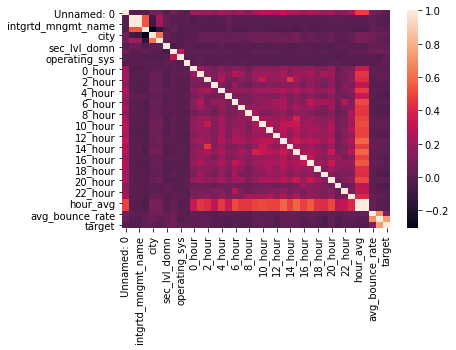

In [66]:
sns.heatmap(botprob.corr())

In [67]:
botprob.drop('intgrtd_mngmt_name',axis=1,inplace=True)

In [68]:
botprob.isnull().any()

Unnamed: 0                     False
ctry_name                      False
intgrtd_operating_team_name    False
city                           False
st                             False
sec_lvl_domn                   False
device_type                    False
operating_sys                  False
ip_addr                        False
0_hour                         False
1_hour                         False
2_hour                         False
3_hour                         False
4_hour                         False
5_hour                         False
6_hour                         False
7_hour                         False
8_hour                         False
9_hour                         False
10_hour                        False
11_hour                        False
12_hour                        False
13_hour                        False
14_hour                        False
15_hour                        False
16_hour                        False
17_hour                        False
1